# What is the probability of a coin coming up heads? 

$P(heads) = p = 0.5$

Bayesian updating: start with a uniform prior $\theta \sim U[0,1]$ for $p$. This means that all values of $\theta$ are equally likely -- we have no idea whether the coin is fair, loaded towards heads or loaded towards tails.

Then, flip the coin and see whether it comes up heads or tails ($y \in \{1,0\}$). Compute $P(\theta | y=\{0,1\})$ for all $\theta$ ie the posterior distribution. 

Flip a coin again, using your posterior as the new prior.

Do this again and again and see what the posterior PDF $P(\theta | y)$ looks like after 10 flips, 100 flips, 1000 flips. It should spike around $p$.



In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.6
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



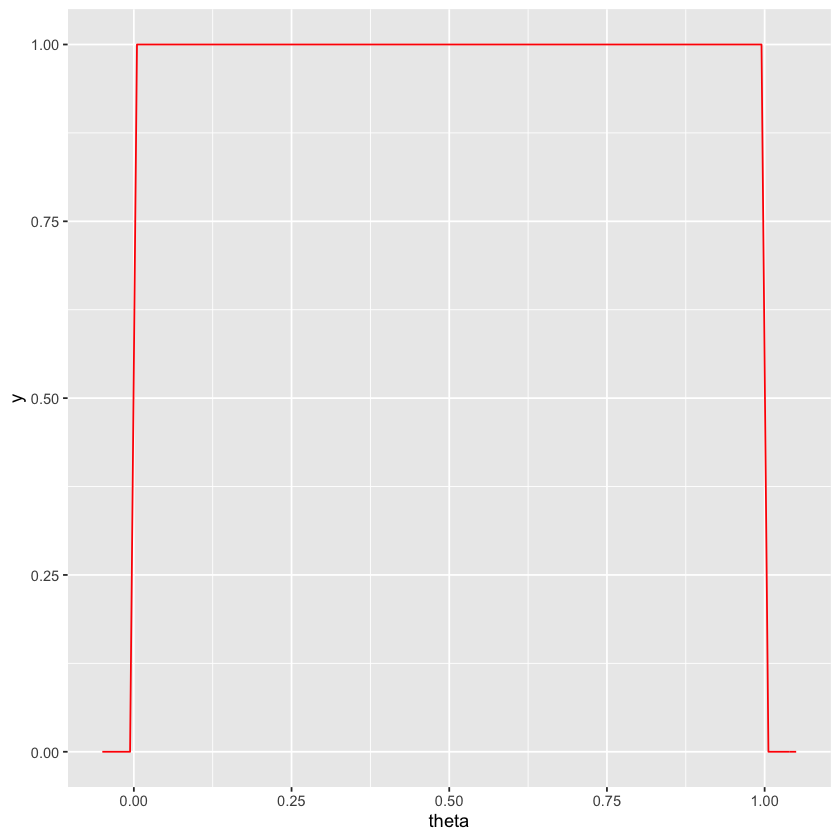

In [3]:
# Uniform distribution, all legitimate values of theta (p) are equally possible
prior <- function(theta) ifelse(theta >= 0 & theta <= 1, 1, 0)
    
ggplot(data.frame(theta = seq(0,1,0.01))), aes(theta)) +
  geom_function(fun = prior, colour = "red")

Warning message in dbinom(num_heads, num_heads + num_tails, theta):
"NaNs produced"
Warning message:
"Removed 10 row(s) containing missing values (geom_path)."


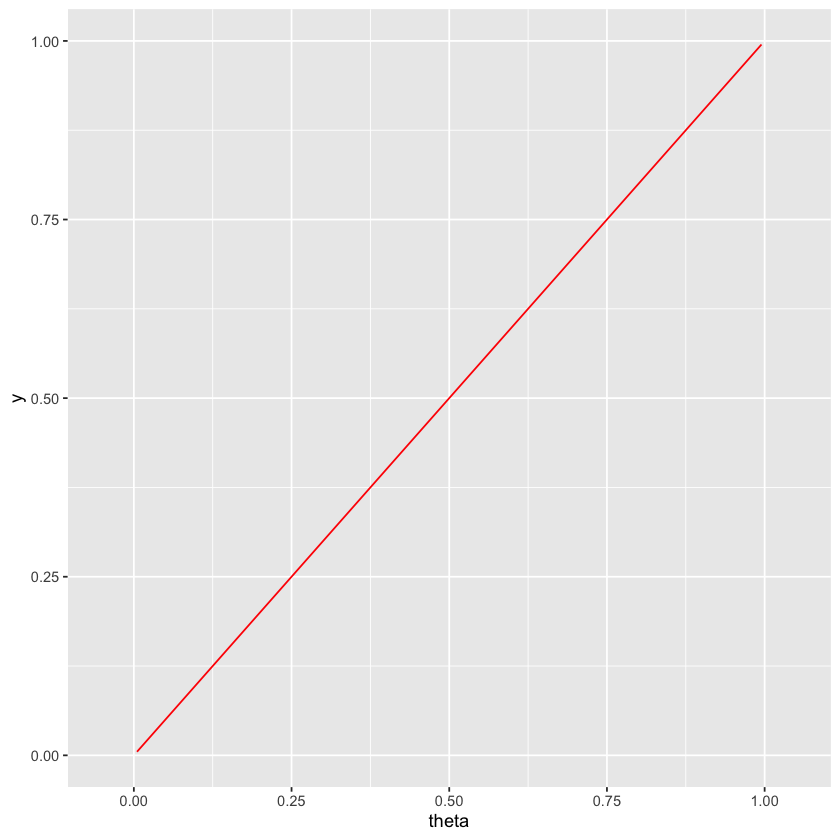

In [38]:
# Binomial Distribution: probability of observing x heads in n trials
likelihood <- function(theta, num_heads,num_tails) dbinom(num_heads, num_heads + num_tails, theta)

# Bayes theorem: f(theta | y) = f(y | theta) * f(theta) / integral [0,1] f(y | theta) * f(theta) d theta
create_posterior <- function(num_heads,num_tails,likelihood,prior) {
    # The bottom normalization constant works out to 0.5 given a bernoulli dist
    function(theta) (likelihood(theta, num_heads,num_tails) * prior(theta)) %>% return()
  }
    
posterior_if_heads <- create_posterior(1,0,likelihood,prior)
ggplot(data.frame(theta = seq(-0.05,1.05,0.01)), aes(theta)) +
  geom_function(fun = posterior_if_heads, colour = "red")


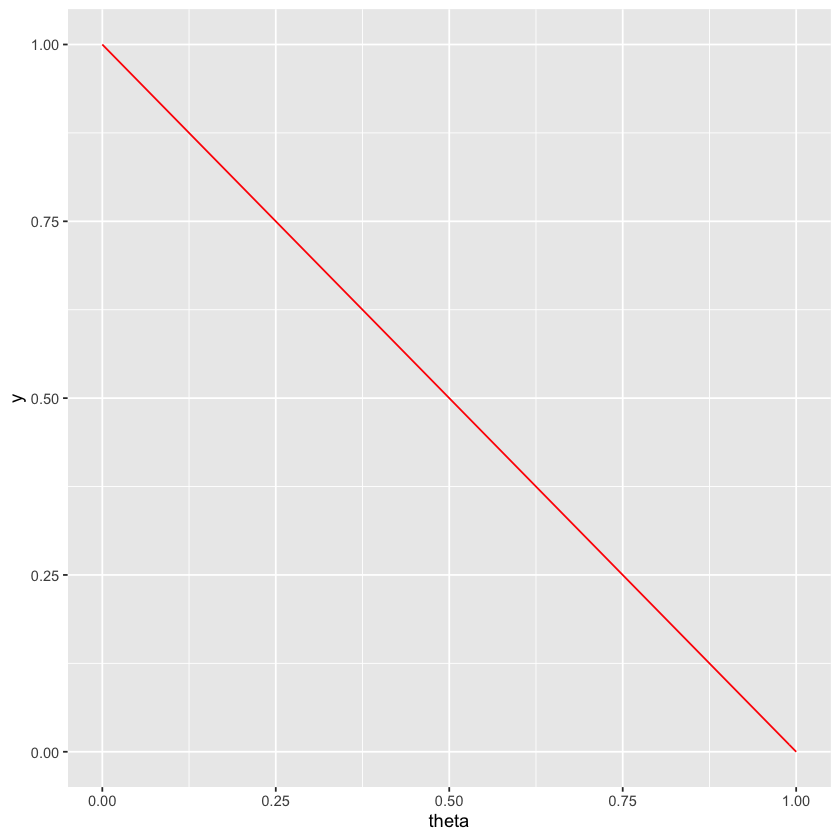

In [39]:
posterior_if_tails <- create_posterior(0,1,likelihood,prior)
ggplot(data.frame(theta = seq(0,1,0.01)), aes(theta)) +
  geom_function(fun = posterior_if_tails, colour = "red")


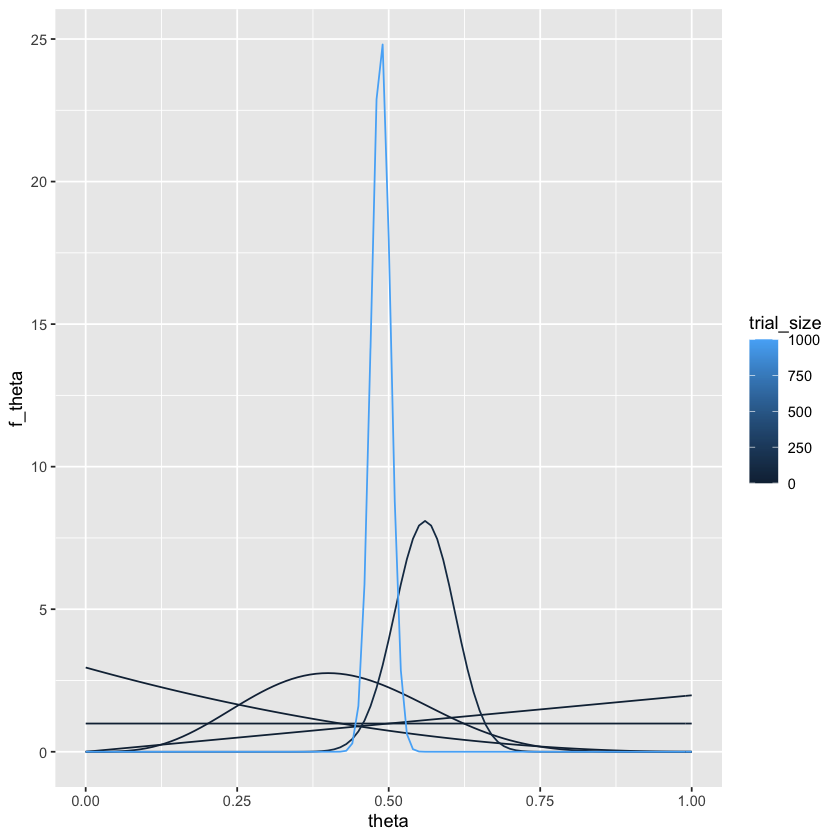

In [47]:
true_prop <- 0.5
pdfs <- tibble(
    theta =  seq(0,1,0.01),
    trial_size = 0,
    f_theta = prior(theta))


for (trial_size in c(1,2,10,100,1000)) {
    num_heads <- rbinom(1, trial_size, true_prop)
    num_tails <- trial_size - num_heads
    a_posterior <- create_posterior(num_heads,num_tails, likelihood, prior)
    new_pdf <- tibble(
        theta =  seq(0,1,0.01),
        trial_size = trial_size,
        f_theta = a_posterior(theta))
    pdfs <- rbind(pdfs,new_pdf)
}
pdfs <- pdfs %>% group_by(trial_size) %>% mutate(f_theta = 100 * f_theta / sum(f_theta))
ggplot(pdfs, 
    aes(x=theta,y=f_theta,color=trial_size,group=trial_size)) + geom_line()

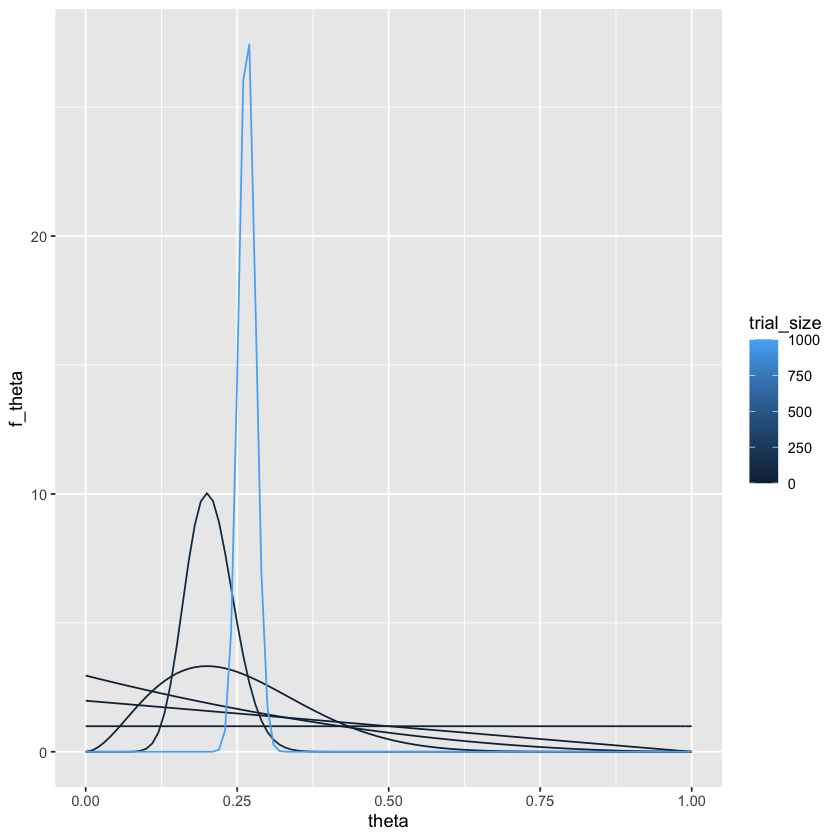

In [48]:
true_prop <- 0.25
pdfs <- tibble(
    theta =  seq(0,1,0.01),
    trial_size = 0,
    f_theta = prior(theta))


for (trial_size in c(1,2,10,100,1000)) {
    num_heads <- rbinom(1, trial_size, true_prop)
    num_tails <- trial_size - num_heads
    a_posterior <- create_posterior(num_heads,num_tails, likelihood, prior)
    new_pdf <- tibble(
        theta =  seq(0,1,0.01),
        trial_size = trial_size,
        f_theta = a_posterior(theta))
    pdfs <- rbind(pdfs,new_pdf)
}
pdfs <- pdfs %>% group_by(trial_size) %>% mutate(f_theta = 100 * f_theta / sum(f_theta))
ggplot(pdfs, 
    aes(x=theta,y=f_theta,color=trial_size,group=trial_size)) + geom_line()

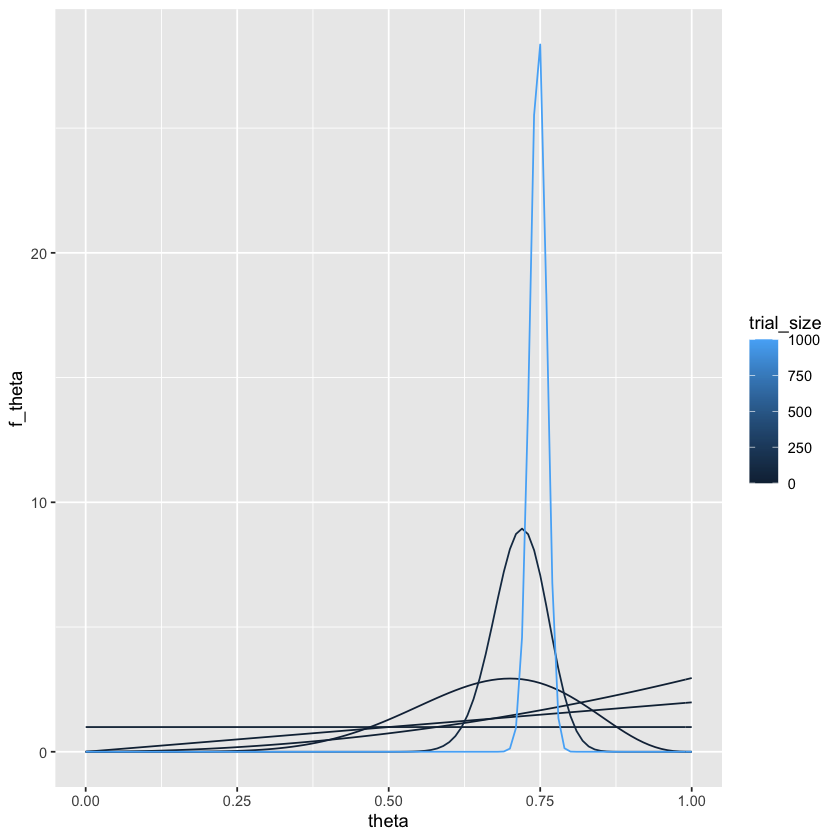

In [49]:
true_prop <- 0.75
pdfs <- tibble(
    theta =  seq(0,1,0.01),
    trial_size = 0,
    f_theta = prior(theta))


for (trial_size in c(1,2,10,100,1000)) {
    num_heads <- rbinom(1, trial_size, true_prop)
    num_tails <- trial_size - num_heads
    a_posterior <- create_posterior(num_heads,num_tails, likelihood, prior)
    new_pdf <- tibble(
        theta =  seq(0,1,0.01),
        trial_size = trial_size,
        f_theta = a_posterior(theta))
    pdfs <- rbind(pdfs,new_pdf)
}
pdfs <- pdfs %>% group_by(trial_size) %>% mutate(f_theta = 100 * f_theta / sum(f_theta))
ggplot(pdfs, 
    aes(x=theta,y=f_theta,color=trial_size,group=trial_size)) + geom_line()